In [74]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
raw_table = pd.read_csv("./Exp1-Table 1.csv", index_col=0)
raw_table.head()

,Avg. Coverage,Avg. Overlaps,Avg. Conflicts,Avg. Accuracy,# of LFs,Snorkel,WMV,MV,DS,FS,Avg. Perf. of LM,Coverage of LM
IMDB (Acc.),,,,,,,,,,,,
General Prompt,0.893808,0.887125,0.331192,0.594508,6,0.6612,0.5868,0.5868,0.5592,0.606,0.6,0.9984
+ Mission Description,0.779770,0.766120,0.609280,0.568447,5,0.6132,0.5996,0.5996,0.5424,0.6116,0.59328,0.9732
+ Human Heuristic,0.764317,0.757975,0.596283,0.644246,6,0.71,0.6524,0.6524,0.588,0.6492,0.6504,0.9854
+ Label Function Example,0.804610,0.792270,0.132770,0.592996,5,0.65,0.6136,0.6136,0.5956,0.6116,0.61688,0.9407
+ Data Example,0.894800,0.894770,0.381840,0.633073,5,0.7132,0.6764,0.6764,0.6896,0.6984,0.6908,0.9998


## Exp 1-2

In [76]:
datasets = ["YouTube", "SMS", "Yelp", "IMDB", "Spouse", "AGnews"]
measurements = ["Accuracy", "F1-Score", "Accuracy", "Accuracy", "F1-Score", "Accuracy"]
types = ["General Question", "+ Mission Description", "+ Human Heuristic", "+ Label Function Example", "+ Data Example", "Wrench"]
lm_names = ["Snorkel", "WMV", "MV", "DS", "FS", "Average"]

In [77]:
imdb_perf = raw_table.iloc[0:6, -2].values
imdb_coverage = raw_table.iloc[0:6, -1].values
sms_perf = raw_table.iloc[8:14, -2].values
sms_coverage = raw_table.iloc[8:14, -1].values
youtube_perf = raw_table.iloc[16:22, -2].values
youtube_coverage = raw_table.iloc[16:22, -1].values
spouse_perf = raw_table.iloc[24:30, -2].values
spouse_coverage = raw_table.iloc[24:30, -1].values
yelp_perf = raw_table.iloc[32:38, -2].values
yelp_coverage = raw_table.iloc[32:38, -1].values
agnews_perf = raw_table.iloc[40:46, -2].values
agnews_coverage = raw_table.iloc[40:46, -1].values

In [78]:
imdb_perf, imdb_coverage, sms_perf, sms_coverage, youtube_perf, youtube_coverage, spouse_perf, spouse_coverage, yelp_perf, yelp_coverage, agnews_perf, agnews_coverage

(array(['0.6', '0.59328', '0.6504', '0.61688', '0.6908', '0.70632'],
       dtype=object),
 array(['0.9984', '0.9732', '0.9854', '0.9407', '0.9998', '0.8758'],
       dtype=object),
 array(['0.61702', '0.48804', '0.52736', '0.1967', '0.57712', '0.1154'],
       dtype=object),
 array(['1.0', '1.0', '1.0', '0.2175', '1.0', '0.4052'], dtype=object),
 array(['0.7272', '0.5936', '0.7136', '0.7416', '0.8432', '0.8136'],
       dtype=object),
 array(['1.0', '1.0', '1.0', '1.0', '1.0', '0.8932'], dtype=object),
 array(['0.32542', '0.3306', '0.31452', '0.2373', '0.33578', '0.28194'],
       dtype=object),
 array(['1.0', '1.0', '0.4697', '1.0', '1.0', '0.2577'], dtype=object),
 array(['0.7219', '0.67726', '0.64838', '0.7223', '0.71052', '0.69562'],
       dtype=object),
 array(['0.9905', '0.9876', '0.9551', '0.9944', '0.9903', '0.8278'],
       dtype=object),
 array(['0.51004', '0.376', '0.57624', '0.52108', '0.44612', '0.62812'],
       dtype=object),
 array(['0.6923', '1.0', '0.6674', '0.8111'

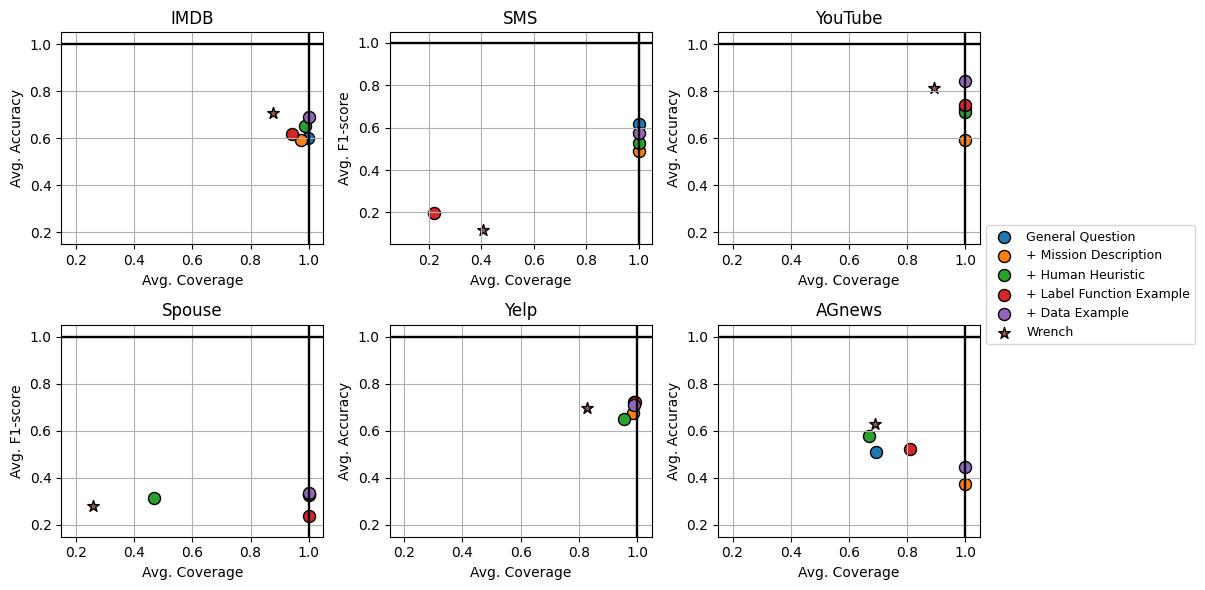

In [79]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

axes[0, 0].grid()
axes[0, 1].grid()
axes[0, 2].grid()
axes[1, 0].grid()
axes[1, 1].grid()
axes[1, 2].grid()

for i, (perf, cov) in enumerate(zip(imdb_perf, imdb_coverage)):
    if i == 5: marker="*"
    else: marker="o"
    axes[0, 0].scatter(x=float(cov), y=float(perf), label=types[i], s=75, marker=marker, edgecolors="black")
    axes[0, 0].axvline(x=1, color="black", alpha=0.7, linestyle="solid")
    axes[0, 0].axhline(y=1, color="black", alpha=0.7, linestyle="solid")
    axes[0, 0].set_ylim(0.15, 1.05)
    axes[0, 0].set_xlim(0.15, 1.05)
    axes[0, 0].set_ylabel("Avg. Accuracy")
    axes[0, 0].set_xlabel("Avg. Coverage")
    axes[0, 0].set_title("IMDB")
    
for i, (perf, cov) in enumerate(zip(sms_perf, sms_coverage)):
    if i == 5: marker="*"
    else: marker="o"
    axes[0, 1].scatter(x=float(cov), y=float(perf), label=types[i], s=75, marker=marker, edgecolors="black")
    axes[0, 1].axvline(x=1, color="black", alpha=0.7, linestyle="solid")
    axes[0, 1].axhline(y=1, color="black", alpha=0.7, linestyle="solid")
    axes[0, 1].set_ylim(0.05, 1.05)
    axes[0, 1].set_xlim(0.05, 1.05)
    axes[0, 1].set_ylabel("Avg. F1-score")
    axes[0, 1].set_xlabel("Avg. Coverage")
    axes[0, 1].set_title("SMS")
    
for i, (perf, cov) in enumerate(zip(youtube_perf, youtube_coverage)):
    if i == 5: marker="*"
    else: marker="o"
    axes[0, 2].scatter(x=float(cov), y=float(perf), label=types[i], s=75, marker=marker, edgecolors="black")
    axes[0, 2].axvline(x=1, color="black", alpha=0.7, linestyle="solid")
    axes[0, 2].axhline(y=1, color="black", alpha=0.7, linestyle="solid")
    axes[0, 2].set_ylim(0.15, 1.05)
    axes[0, 2].set_xlim(0.15, 1.05)
    axes[0, 2].set_ylabel("Avg. Accuracy")
    axes[0, 2].set_xlabel("Avg. Coverage")
    axes[0, 2].set_title("YouTube")
    
for i, (perf, cov) in enumerate(zip(spouse_perf, spouse_coverage)):
    if i == 5: marker="*"
    else: marker="o"
    axes[1, 0].scatter(x=float(cov), y=float(perf), label=types[i], s=75, marker=marker, edgecolors="black")
    axes[1, 0].axvline(x=1, color="black", alpha=0.7, linestyle="solid")
    axes[1, 0].axhline(y=1, color="black", alpha=0.7, linestyle="solid")
    axes[1, 0].set_ylim(0.15, 1.05)
    axes[1, 0].set_xlim(0.15, 1.05)
    axes[1, 0].set_ylabel("Avg. F1-score")
    axes[1, 0].set_xlabel("Avg. Coverage")
    axes[1, 0].set_title("Spouse")
    
for i, (perf, cov) in enumerate(zip(yelp_perf, yelp_coverage)):
    if i == 5: marker="*"
    else: marker="o"
    axes[1, 1].scatter(x=float(cov), y=float(perf), label=types[i], s=75, marker=marker, edgecolors="black")
    axes[1, 1].axvline(x=1, color="black", alpha=0.7, linestyle="solid")
    axes[1, 1].axhline(y=1, color="black", alpha=0.7, linestyle="solid")
    axes[1, 1].set_ylim(0.15, 1.05)
    axes[1, 1].set_xlim(0.15, 1.05)
    axes[1, 1].set_ylabel("Avg. Accuracy")
    axes[1, 1].set_xlabel("Avg. Coverage")
    axes[1, 1].set_title("Yelp")
    
for i, (perf, cov) in enumerate(zip(agnews_perf, agnews_coverage)):
    if i == 5: marker="*"
    else: marker="o"
    axes[1, 2].scatter(x=float(cov), y=float(perf), label=types[i], s=75, marker=marker, edgecolors="black")
    axes[1, 2].axvline(x=1, color="black", alpha=0.7, linestyle="solid")
    axes[1, 2].axhline(y=1, color="black", alpha=0.7, linestyle="solid")
    axes[1, 2].set_ylim(0.15, 1.05)
    axes[1, 2].set_xlim(0.15, 1.05)
    axes[1, 2].set_ylabel("Avg. Accuracy")
    axes[1, 2].set_xlabel("Avg. Coverage")
    axes[1, 2].set_title("AGnews")

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.0, 1.5), fontsize=9)
plt.show()

## Exp 2

In [80]:
raw_table2 = pd.read_csv("./Exp2-Table 1.csv", index_col=0)
raw_table2

,# of WrenchLFs,# of CodexLFs,Snorkel + LR,WMV + LR,MV + LR,DS (Dawid-Skene) + LR,FS (FlyingSquid) + LR,Avg. Perf. of EM,Coverage of EM
IMDB (Acc.),,,,,,,,,
Wrench,5,0,0.7584,0.7544,0.7544,0.754,0.756,0.75544,0.8758
CodexLF (GP) + Wrench,5,6,0.7404,0.7368,0.7424,0.7672,0.7388,0.74512,1.0
CodexLF (MD) + Wrench,5,5,0.7316,0.7564,0.7612,0.7668,0.7472,0.75264,1.0
CodexLF (HH) + Wrench,5,6,0.7628,0.7692,0.7712,0.7848,0.7568,0.76896,1.0
CodexLF (LFE) + Wrench,5,5,0.7368,0.7464,0.75,0.7864,0.7348,0.75088,1.0
CodexLF (DE) + Wrench,5,5,0.77,0.7516,0.7568,0.7576,0.7668,0.76056,1.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMS (F1),# of WrenchLFs,# of CodexLFs,Snorkel + LR,WMV + LR,MV + LR,DS (Dawid-Skene) + LR,FS (FlyingSquid) + LR,Avg. Perf. of EM,Coverage of EM
Wrench,73,0,0.6783,0.7717,0.7559,0.75,0.0571,0.6026,0.4052


In [81]:
imdb_perf = raw_table2.iloc[0:6, -2].values
imdb_coverage = raw_table2.iloc[0:6, -1].values
sms_perf = raw_table2.iloc[8:14, -2].values
sms_coverage = raw_table2.iloc[8:14, -1].values
youtube_perf = raw_table2.iloc[16:22, -2].values
youtube_coverage = raw_table2.iloc[16:22, -1].values
spouse_perf = raw_table2.iloc[24:30, -2].values
spouse_coverage = raw_table2.iloc[24:30, -1].values
yelp_perf = raw_table2.iloc[32:38, -2].values
yelp_coverage = raw_table2.iloc[32:38, -1].values
agnews_perf = raw_table2.iloc[40:46, -2].values
agnews_coverage = raw_table2.iloc[40:46, -1].values

In [82]:
imdb_perf, imdb_coverage, sms_perf, sms_coverage, youtube_perf, youtube_coverage, spouse_perf, spouse_coverage, yelp_perf, yelp_coverage, agnews_perf, agnews_coverage

(array(['0.75544', '0.74512', '0.75264', '0.76896', '0.75088', '0.76056'],
       dtype=object),
 array(['0.8758', '1.0', '1.0', '1.0', '1.0', '1.0'], dtype=object),
 array(['0.6026', '0.63862', '0.53838', '0.55304', '0.39628', '0.61724'],
       dtype=object),
 array(['0.4052', '1.0', '1.0', '1.0', '1.0', '1.0'], dtype=object),
 array(['0.7928', '0.7872', '0.7616', '0.792', '0.7776', '0.7848'],
       dtype=object),
 array(['0.8932', '1.0', '1.0', '1.0', '1.0', '1.0'], dtype=object),
 array(['0.2027', '0.24274', '0.24386', '0.17816', '0.1385', '0.25304'],
       dtype=object),
 array(['0.2577', '1.0', '1.0', '1.0', '1.0', '1.0'], dtype=object),
 array(['0.72174', '0.73116', '0.7312', '0.6931', '0.70904', '0.73068'],
       dtype=object),
 array(['0.8278', '1.0', '1.0', '1.0', '1.0', '1.0'], dtype=object),
 array(['0.82386', '0.80436', '0.71094', '0.80174', '0.79222', '0.72216'],
       dtype=object),
 array(['0.6908', '1.0', '1.0', '1.0', '1.0', '1.0'], dtype=object))

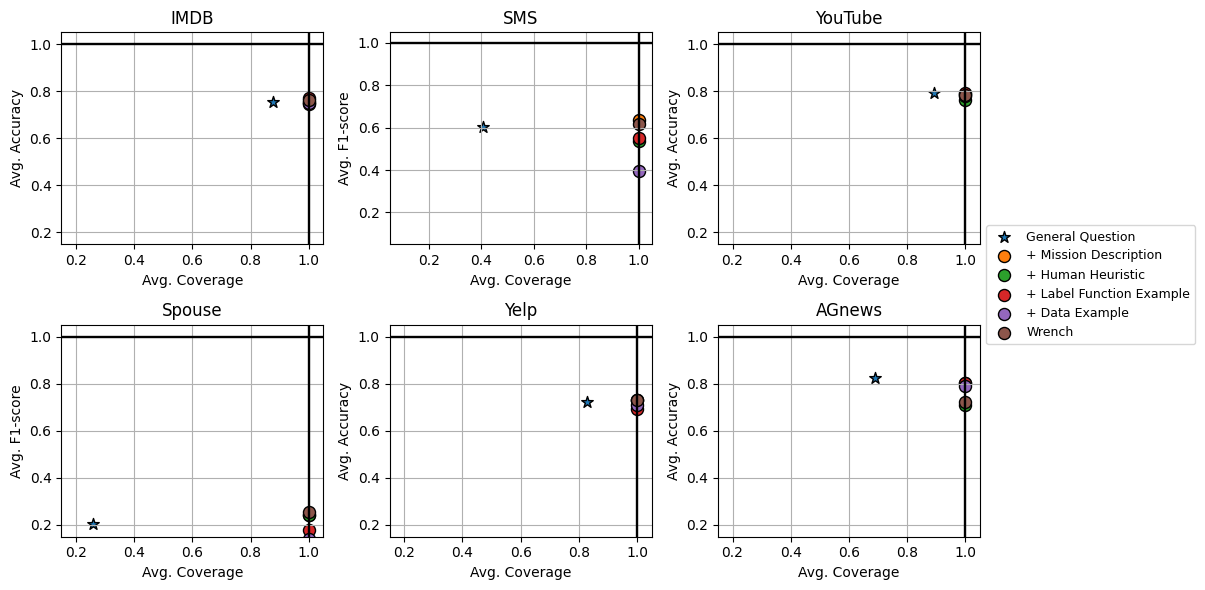

In [83]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

axes[0, 0].grid()
axes[0, 1].grid()
axes[0, 2].grid()
axes[1, 0].grid()
axes[1, 1].grid()
axes[1, 2].grid()

for i, (perf, cov) in enumerate(zip(imdb_perf, imdb_coverage)):
    if i == 0: marker="*"
    else: marker="o"
    axes[0, 0].scatter(x=float(cov), y=float(perf), label=types[i], s=75, marker=marker, edgecolors="black")
    axes[0, 0].axvline(x=1, color="black", alpha=0.7, linestyle="solid")
    axes[0, 0].axhline(y=1, color="black", alpha=0.7, linestyle="solid")
    axes[0, 0].set_ylim(0.15, 1.05)
    axes[0, 0].set_xlim(0.15, 1.05)
    axes[0, 0].set_ylabel("Avg. Accuracy")
    axes[0, 0].set_xlabel("Avg. Coverage")
    axes[0, 0].set_title("IMDB")
    
for i, (perf, cov) in enumerate(zip(sms_perf, sms_coverage)):
    if i == 0: marker="*"
    else: marker="o"
    axes[0, 1].scatter(x=float(cov), y=float(perf), label=types[i], s=75, marker=marker, edgecolors="black")
    axes[0, 1].axvline(x=1, color="black", alpha=0.7, linestyle="solid")
    axes[0, 1].axhline(y=1, color="black", alpha=0.7, linestyle="solid")
    axes[0, 1].set_ylim(0.05, 1.05)
    axes[0, 1].set_xlim(0.05, 1.05)
    axes[0, 1].set_ylabel("Avg. F1-score")
    axes[0, 1].set_xlabel("Avg. Coverage")
    axes[0, 1].set_title("SMS")
    
for i, (perf, cov) in enumerate(zip(youtube_perf, youtube_coverage)):
    if i == 0: marker="*"
    else: marker="o"
    axes[0, 2].scatter(x=float(cov), y=float(perf), label=types[i], s=75, marker=marker, edgecolors="black")
    axes[0, 2].axvline(x=1, color="black", alpha=0.7, linestyle="solid")
    axes[0, 2].axhline(y=1, color="black", alpha=0.7, linestyle="solid")
    axes[0, 2].set_ylim(0.15, 1.05)
    axes[0, 2].set_xlim(0.15, 1.05)
    axes[0, 2].set_ylabel("Avg. Accuracy")
    axes[0, 2].set_xlabel("Avg. Coverage")
    axes[0, 2].set_title("YouTube")
    
for i, (perf, cov) in enumerate(zip(spouse_perf, spouse_coverage)):
    if i == 0: marker="*"
    else: marker="o"
    axes[1, 0].scatter(x=float(cov), y=float(perf), label=types[i], s=75, marker=marker, edgecolors="black")
    axes[1, 0].axvline(x=1, color="black", alpha=0.7, linestyle="solid")
    axes[1, 0].axhline(y=1, color="black", alpha=0.7, linestyle="solid")
    axes[1, 0].set_ylim(0.15, 1.05)
    axes[1, 0].set_xlim(0.15, 1.05)
    axes[1, 0].set_ylabel("Avg. F1-score")
    axes[1, 0].set_xlabel("Avg. Coverage")
    axes[1, 0].set_title("Spouse")
    
for i, (perf, cov) in enumerate(zip(yelp_perf, yelp_coverage)):
    if i == 0: marker="*"
    else: marker="o"
    axes[1, 1].scatter(x=float(cov), y=float(perf), label=types[i], s=75, marker=marker, edgecolors="black")
    axes[1, 1].axvline(x=1, color="black", alpha=0.7, linestyle="solid")
    axes[1, 1].axhline(y=1, color="black", alpha=0.7, linestyle="solid")
    axes[1, 1].set_ylim(0.15, 1.05)
    axes[1, 1].set_xlim(0.15, 1.05)
    axes[1, 1].set_ylabel("Avg. Accuracy")
    axes[1, 1].set_xlabel("Avg. Coverage")
    axes[1, 1].set_title("Yelp")
    
for i, (perf, cov) in enumerate(zip(agnews_perf, agnews_coverage)):
    if i == 0: marker="*"
    else: marker="o"
    axes[1, 2].scatter(x=float(cov), y=float(perf), label=types[i], s=75, marker=marker, edgecolors="black")
    axes[1, 2].axvline(x=1, color="black", alpha=0.7, linestyle="solid")
    axes[1, 2].axhline(y=1, color="black", alpha=0.7, linestyle="solid")
    axes[1, 2].set_ylim(0.15, 1.05)
    axes[1, 2].set_xlim(0.15, 1.05)
    axes[1, 2].set_ylabel("Avg. Accuracy")
    axes[1, 2].set_xlabel("Avg. Coverage")
    axes[1, 2].set_title("AGnews")

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.0, 1.5), fontsize=9)
plt.show()